In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters
input_size = 784
hidden_size1 = 500
hidden_size2 = 300
num_classes = 10

In [4]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [5]:
# Define the neural network models with different activation functions
class NeuralNetReLU(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetReLU, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = torch.relu(self.fc2(out))
        out = self.fc3(out)
        return out

class NeuralNetSigmoid(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = torch.sigmoid(self.fc1(x))
        out = torch.sigmoid(self.fc2(out))
        out = self.fc3(out)
        return out

class NeuralNetTanh(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetTanh, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = torch.tanh(self.fc1(x))
        out = torch.tanh(self.fc2(out))
        out = self.fc3(out)
        return out

In [6]:
# Function to train the model
def train_model(model, train_loader, num_epochs, criterion, optimizer):
    loss_values = []
    for epoch in range(num_epochs):
        for images, labels in train_loader:  
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_values.append(loss.item())
    return loss_values

# Function to test the model
def test_model(model, test_loader):
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [7]:
# Function to perform experiments with different hyperparameters
def run_experiment(learning_rates, batch_sizes, epochs_list):
    results = []
    for lr in learning_rates:
        for bs in batch_sizes:
            for epochs in epochs_list:
                # Load data with the current batch size
                train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

                # Initialize model, loss function, and optimizer
                model = NeuralNetReLU(input_size, hidden_size1, hidden_size2, num_classes).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                # Train and test the model
                train_model(model, train_loader, epochs, criterion, optimizer)
                accuracy = test_model(model, test_loader)

                # Record the results
                results.append((lr, bs, epochs, accuracy))
    return results

In [8]:
# Define hyperparameters for experimentation
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
epochs_list = [5, 10, 20]

In [9]:
# Run the experiment
experiment_results = run_experiment(learning_rates, batch_sizes, epochs_list)

In [10]:
# Convert results to a dataframe for better visualization
results_df = pd.DataFrame(experiment_results, columns=['Learning Rate', 'Batch Size', 'Epochs', 'Accuracy'])
print(results_df)

    Learning Rate  Batch Size  Epochs  Accuracy
0          0.0001          32       5     97.22
1          0.0001          32      10     98.09
2          0.0001          32      20     98.12
3          0.0001          64       5     96.37
4          0.0001          64      10     97.66
5          0.0001          64      20     98.17
6          0.0001         128       5     95.68
7          0.0001         128      10     97.11
8          0.0001         128      20     98.00
9          0.0010          32       5     97.51
10         0.0010          32      10     98.00
11         0.0010          32      20     97.94
12         0.0010          64       5     97.74
13         0.0010          64      10     97.83
14         0.0010          64      20     98.17
15         0.0010         128       5     97.62
16         0.0010         128      10     97.85
17         0.0010         128      20     97.88
18         0.0100          32       5     95.76
19         0.0100          32      10   

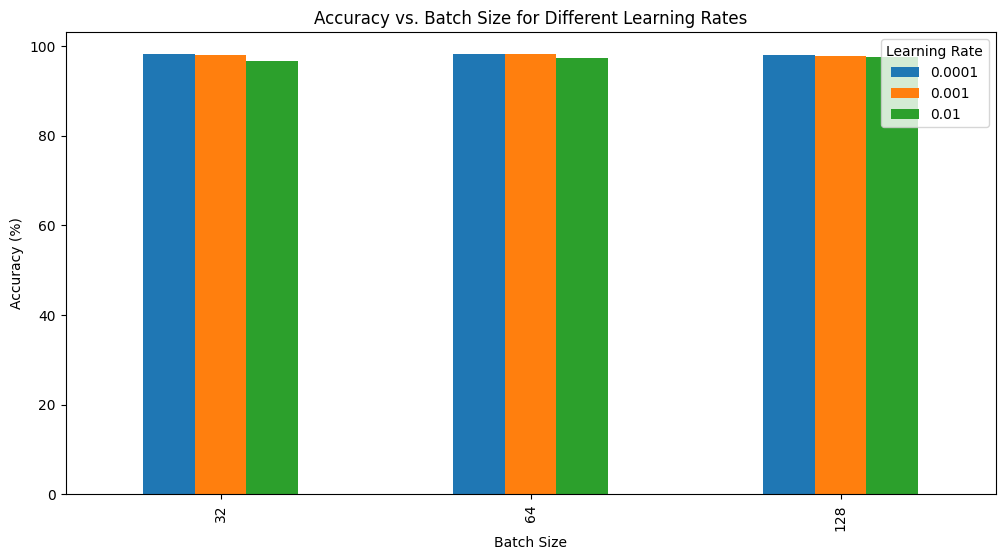

In [11]:
# Visualize the results
results_df.pivot_table(values='Accuracy', index='Batch Size', columns='Learning Rate', aggfunc='max').plot(kind='bar', figsize=(12, 6))
plt.title('Accuracy vs. Batch Size for Different Learning Rates')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.show()